In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librairies importées avec succès")

✅ Librairies importées avec succès


✅ Dataset chargé:
   • Forme des données: (10000, 784)
   • Nombre d'échantillons: 10000
   • Nombre de features: 784
   • Classes: [0 1 2 3 4 5 6 7 8 9]


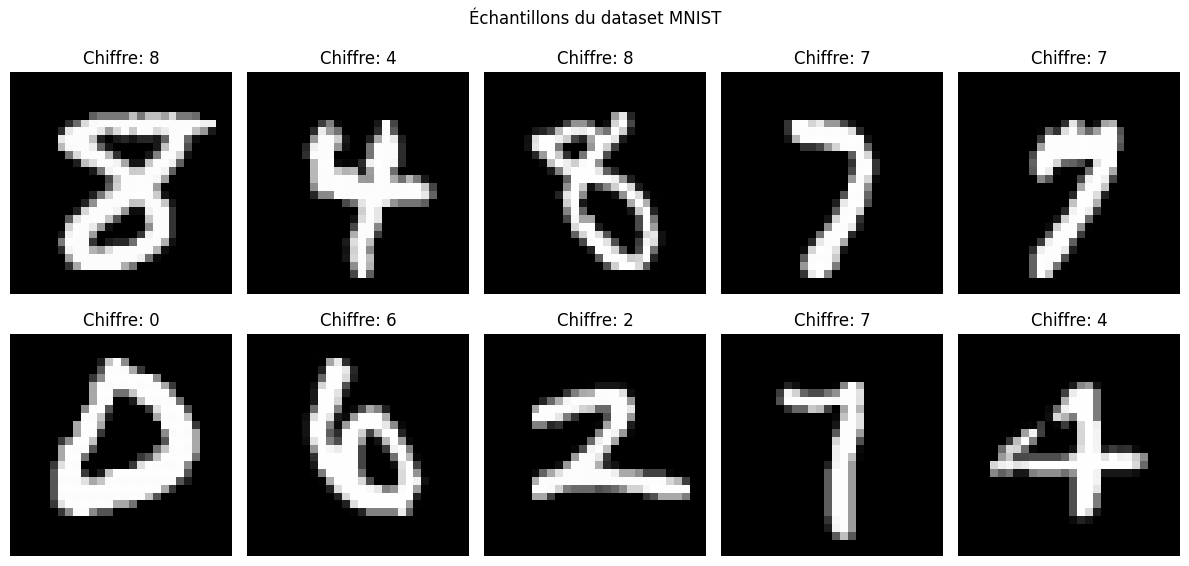

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.values, mnist.target.values.astype(int)

n_samples = 10000
np.random.seed(42)
indices = np.random.choice(X.shape[0], n_samples, replace=False)
X = X[indices] / 255.0
y = y[indices]

print(f"✅ Dataset chargé:")
print(f"   • Forme des données: {X.shape}")
print(f"   • Nombre d'échantillons: {len(X)}")
print(f"   • Nombre de features: {X.shape[1]}")
print(f"   • Classes: {np.unique(y)}")

# %%
# Visualisation de quelques échantillons
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Chiffre: {y[i]}')
    axes[row, col].axis('off')

plt.suptitle('Échantillons du dataset MNIST')
plt.tight_layout()
plt.show()

In [3]:
class FullScratchPCA:
    def __init__(self, n_components, max_iter=1000, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.mean = None
        self.components = None
        self.eigenvalues = None
        self.explained_variance_ratio = None

    def center_data(self, X):
        """Centre les données"""
        self.mean = np.mean(X, axis=0)
        return X - self.mean

    def compute_covariance_matrix(self, X_centered):
        """Calcule la matrice de covariance"""
        n_samples = X_centered.shape[0]
        return (1 / (n_samples - 1)) * (X_centered.T @ X_centered)

    def power_iteration(self, A):
        """Power iteration pour trouver le vecteur propre dominant"""
        n = A.shape[1]
        v = np.random.rand(n)
        v /= np.linalg.norm(v)

        eigenvalue = 0
        for _ in range(self.max_iter):
            Av = A @ v
            eigenvalue = np.dot(v, Av)  # Quotient de Rayleigh
            v_new = Av / np.linalg.norm(Av)
            if np.linalg.norm(v - v_new) < self.tol:
                break
            v = v_new

        return v, eigenvalue

    def deflate_matrix(self, A, v, eigenvalue):
        """Déflation de la matrice"""
        return A - eigenvalue * np.outer(v, v)

    def fit(self, X):
        """Ajuste la PCA aux données"""
        print(f"🔄 Entraînement PCA avec {self.n_components} composantes...")

        X_centered = self.center_data(X)
        cov_matrix = self.compute_covariance_matrix(X_centered)

        A = cov_matrix.copy()
        components = []
        eigenvalues = []

        for i in range(self.n_components):
            if (i + 1) % 10 == 0:
                print(f"   • Composante {i+1}/{self.n_components}")
            v, eigenvalue = self.power_iteration(A)
            components.append(v)
            eigenvalues.append(eigenvalue)
            A = self.deflate_matrix(A, v, eigenvalue)

        self.components = np.array(components).T  # shape (features, n_components)
        self.eigenvalues = np.array(eigenvalues)

        # Calcul variance expliquée
        total_variance = np.trace(cov_matrix)
        self.explained_variance_ratio = self.eigenvalues / total_variance

        print(f"✅ PCA entraînée avec succès!")
        print(f"   • Variance expliquée totale: {np.sum(self.explained_variance_ratio):.3f}")

        return self

    def compress(self, X):
        """Compression : projection dans l'espace réduit"""
        if self.components is None:
            raise ValueError("PCA not fitted. Call fit() first.")
        X_centered = X - self.mean
        return X_centered @ self.components

    def decompress(self, X_compressed):
        """Décompression : retour dans l'espace original"""
        if self.components is None:
            raise ValueError("PCA not fitted. Call fit() first.")
        return X_compressed @ self.components.T + self.mean

    def transform(self, X):
        """Alias de compress"""
        return self.compress(X)

    def inverse_transform(self, X_compressed):
        """Alias de decompress"""
        return self.decompress(X_compressed)

print("✅ Classe FullScratchPCA définie")

✅ Classe FullScratchPCA définie


🎯 ÉTAPE 1: Visualisation 2D
🔄 Entraînement PCA avec 2 composantes...
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.169


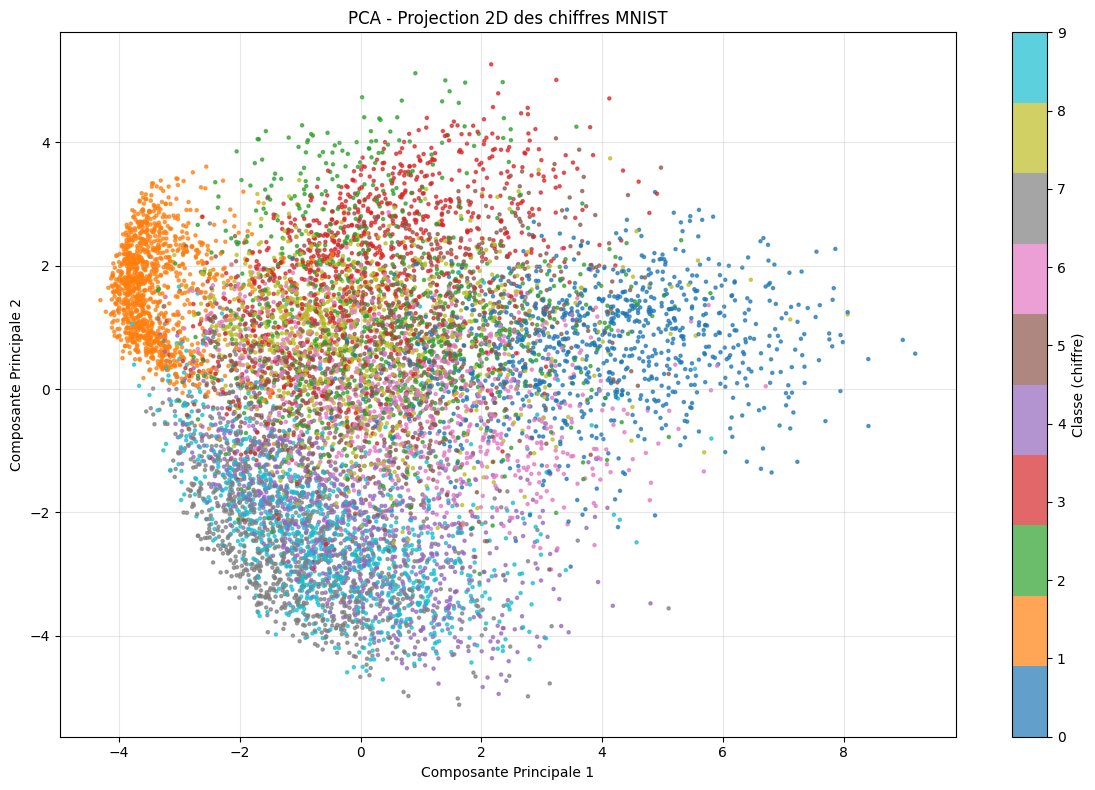

✅ Projection 2D terminée
   • Variance expliquée: 0.169


In [4]:
print("🎯 ÉTAPE 1: Visualisation 2D")
pca2d = FullScratchPCA(n_components=2)
pca2d.fit(X)

# Projeter les données
X_proj = pca2d.transform(X)

# Visualisation
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='tab10', s=5, alpha=0.7)
plt.title("PCA - Projection 2D des chiffres MNIST")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.colorbar(scatter, label="Classe (chiffre)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Projection 2D terminée")
print(f"   • Variance expliquée: {np.sum(pca2d.explained_variance_ratio):.3f}")


🎯 ÉTAPE 2: Analyse de compression multi-composantes

📊 Test avec 10 composantes...
🔄 Entraînement PCA avec 10 composantes...
   • Composante 10/10
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.490

📊 Test avec 20 composantes...
🔄 Entraînement PCA avec 20 composantes...
   • Composante 10/20
   • Composante 20/20
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.645

📊 Test avec 50 composantes...
🔄 Entraînement PCA avec 50 composantes...
   • Composante 10/50
   • Composante 20/50
   • Composante 30/50
   • Composante 40/50
   • Composante 50/50
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.826

📊 Test avec 70 composantes...
🔄 Entraînement PCA avec 70 composantes...
   • Composante 10/70
   • Composante 20/70
   • Composante 30/70
   • Composante 40/70
   • Composante 50/70
   • Composante 60/70
   • Composante 70/70
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.876

📊 Test avec 100 composantes...
🔄 Entraînement PCA avec 10

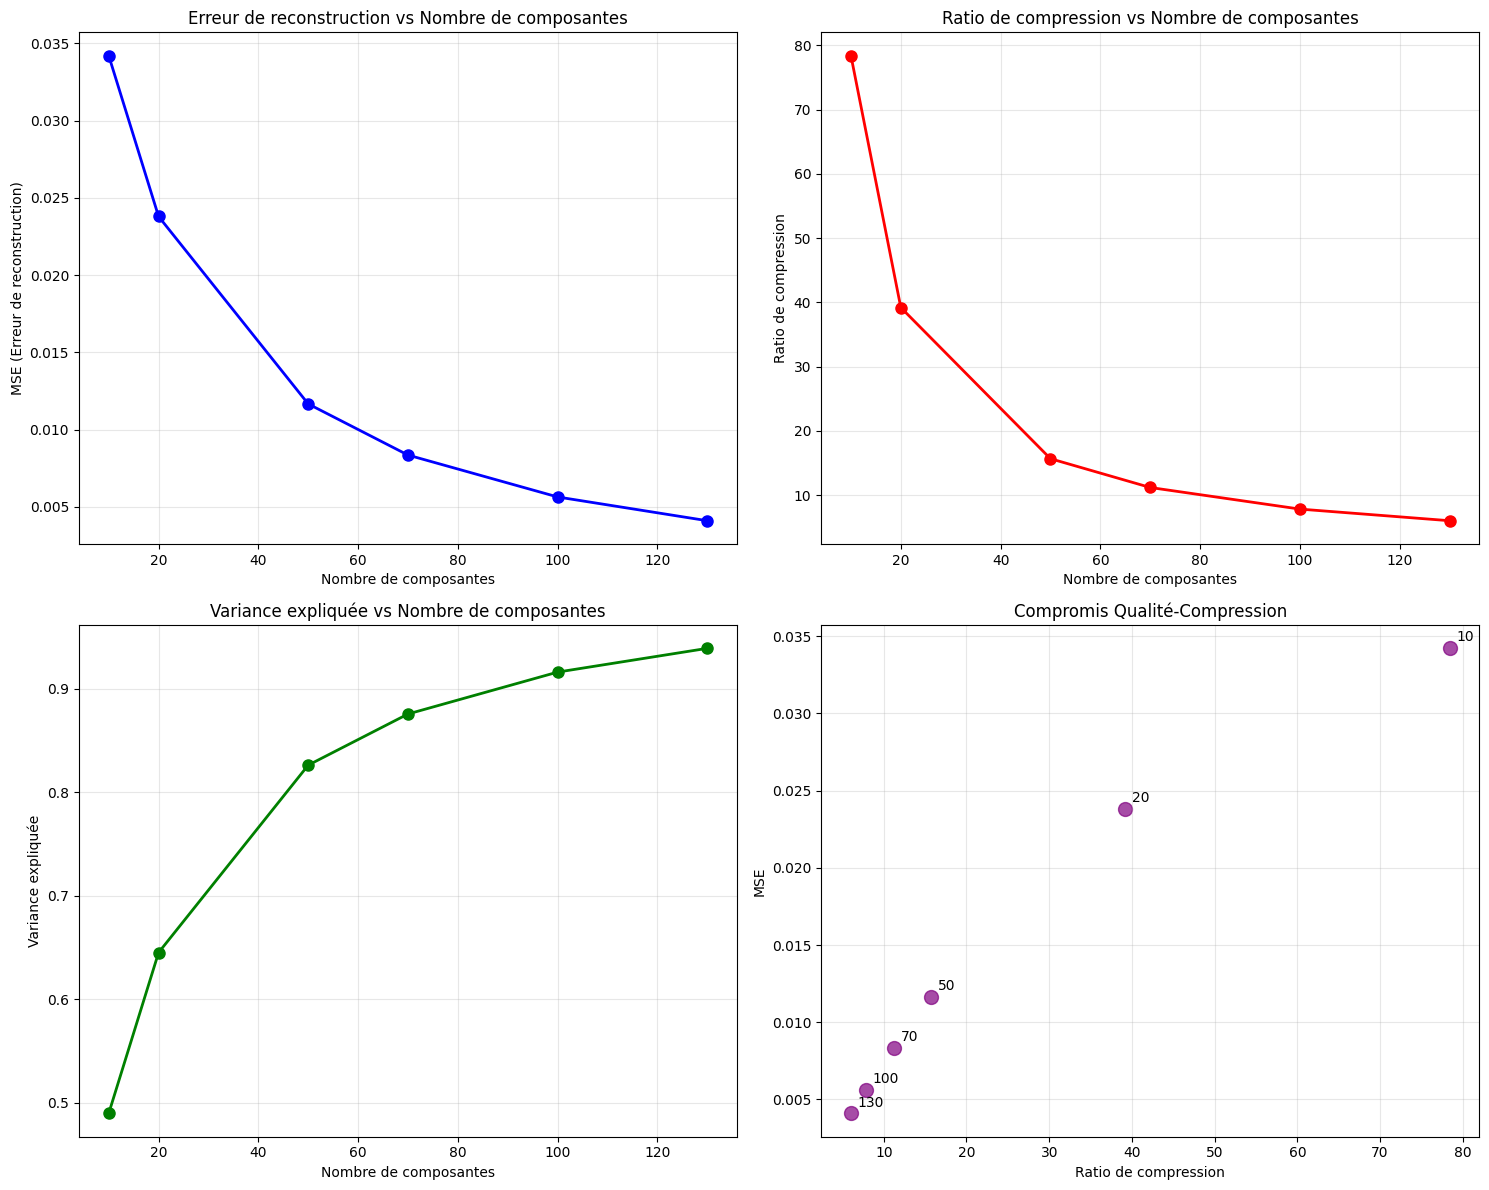


🖼️ Comparaison visuelle des reconstructions:


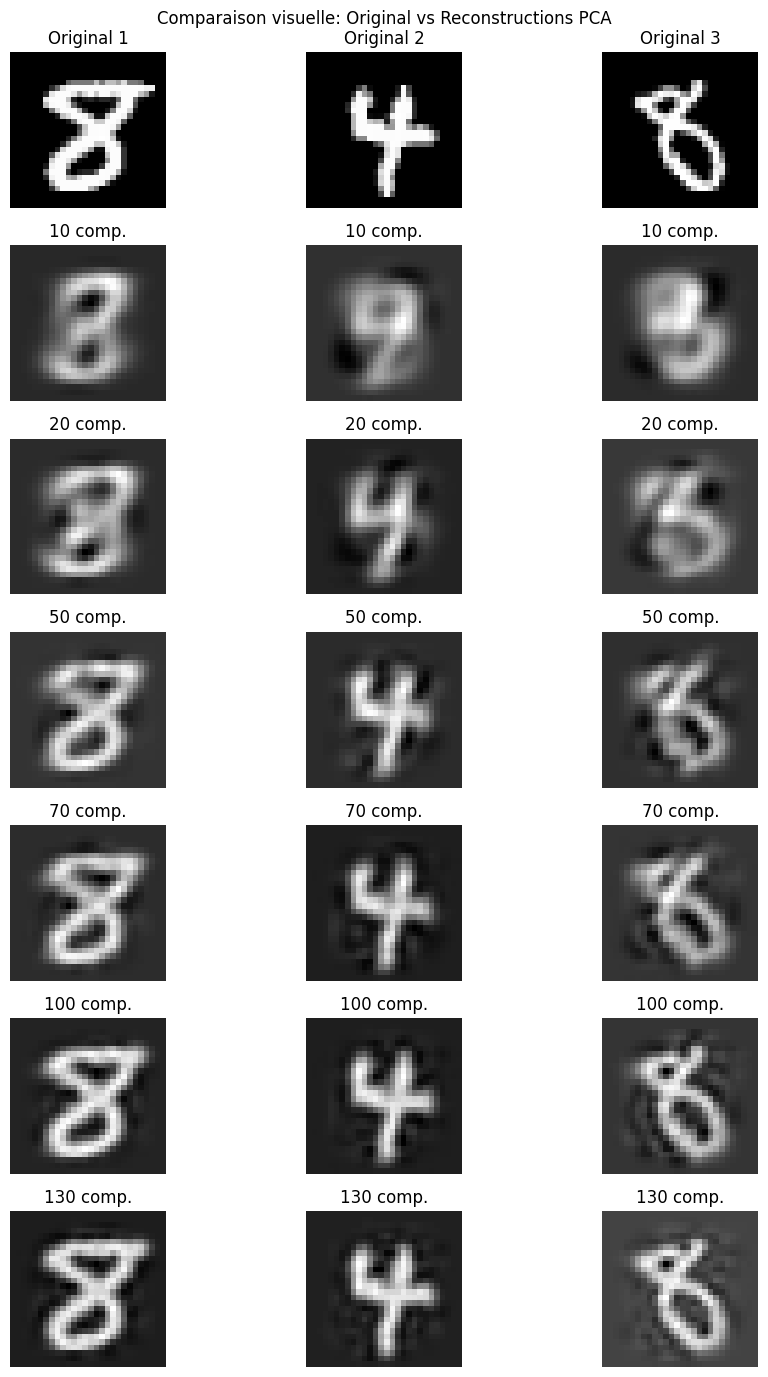


💡 RECOMMANDATIONS:
   • Meilleur équilibre qualité/compression: 130 composantes
   • Meilleure compression: 10 composantes
   • Meilleure qualité: 130 composantes


In [5]:
# %%
print("🎯 ÉTAPE 2: Analyse de compression multi-composantes")

# Configuration
components_list = [10, 20, 50, 70, 100, 130]
results = []
reconstructions = []

# Test pour chaque nombre de composantes
for n_comp in components_list:
    print(f"\n📊 Test avec {n_comp} composantes...")

    # Créer et entraîner PCA
    pca = FullScratchPCA(n_components=n_comp)
    pca.fit(X)

    X_compressed = pca.compress(X)
    X_reconstructed = pca.decompress(X_compressed)

    # Calcul des métriques
    mse = np.mean((X - X_reconstructed) ** 2)
    compression_ratio = X.shape[1] / n_comp

    results.append({
        'n_components': n_comp,
        'mse': mse,
        'compression_ratio': compression_ratio,
        'variance_explained': np.sum(pca.explained_variance_ratio)
    })

    # Sauvegarder quelques reconstructions
    reconstructions.append(X_reconstructed[:3])

# %%
# Affichage des résultats
print("\n📈 RÉSULTATS DE LA COMPARAISON:")
print("=" * 70)
print(f"{'Composantes':<12} {'Ratio':<8} {'MSE':<10} {'Variance':<10} {'Qualité'}")
print("=" * 70)

for result in results:
    quality = "Excellent" if result['mse'] < 0.01 else "Bon" if result['mse'] < 0.02 else "Moyen" if result['mse'] < 0.05 else "Faible"
    print(f"{result['n_components']:<12} {result['compression_ratio']:<8.1f} {result['mse']:<10.5f} {result['variance_explained']:<10.3f} {quality}")

# %%
# Graphiques des métriques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# MSE vs Composantes
axes[0, 0].plot([r['n_components'] for r in results],
                [r['mse'] for r in results],
                'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Nombre de composantes')
axes[0, 0].set_ylabel('MSE (Erreur de reconstruction)')
axes[0, 0].set_title('Erreur de reconstruction vs Nombre de composantes')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot([r['n_components'] for r in results],
                [r['compression_ratio'] for r in results],
                'ro-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Nombre de composantes')
axes[0, 1].set_ylabel('Ratio de compression')
axes[0, 1].set_title('Ratio de compression vs Nombre de composantes')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot([r['n_components'] for r in results],
                [r['variance_explained'] for r in results],
                'go-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Nombre de composantes')
axes[1, 0].set_ylabel('Variance expliquée')
axes[1, 0].set_title('Variance expliquée vs Nombre de composantes')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter([r['compression_ratio'] for r in results],
                   [r['mse'] for r in results],
                   s=100, c='purple', alpha=0.7)
for i, result in enumerate(results):
    axes[1, 1].annotate(f"{result['n_components']}",
                       (result['compression_ratio'], result['mse']),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('Ratio de compression')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].set_title('Compromis Qualité-Compression')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\n🖼️ Comparaison visuelle des reconstructions:")

fig, axes = plt.subplots(len(components_list) + 1, 3, figsize=(10, 2 * (len(components_list) + 1)))

for j in range(3):
    axes[0, j].imshow(X[j].reshape(28, 28), cmap='gray')
    axes[0, j].set_title(f'Original {j+1}')
    axes[0, j].axis('off')

for i, (n_comp, reconstruction) in enumerate(zip(components_list, reconstructions)):
    for j in range(3):
        axes[i + 1, j].imshow(reconstruction[j].reshape(28, 28), cmap='gray')
        axes[i + 1, j].set_title(f'{n_comp} comp.')
        axes[i + 1, j].axis('off')

plt.suptitle('Comparaison visuelle: Original vs Reconstructions PCA')
plt.tight_layout()
plt.show()

# %%
# Recommandations
print("\n💡 RECOMMANDATIONS:")
best_balance = min(results, key=lambda x: x['mse'] + 0.001 * x['compression_ratio'])
best_compression = max(results, key=lambda x: x['compression_ratio'])
best_quality = min(results, key=lambda x: x['mse'])

print(f"   • Meilleur équilibre qualité/compression: {best_balance['n_components']} composantes")
print(f"   • Meilleure compression: {best_compression['n_components']} composantes")
print(f"   • Meilleure qualité: {best_quality['n_components']} composantes")


🎯 ÉTAPE 3: Génération de variations
🔄 Entraînement PCA avec 50 composantes...
   • Composante 10/50
   • Composante 20/50
   • Composante 30/50
   • Composante 40/50
   • Composante 50/50
✅ PCA entraînée avec succès!
   • Variance expliquée totale: 0.826

📊 Exemple 1: Génération de variations du chiffre 7
   • Image choisie: index 3


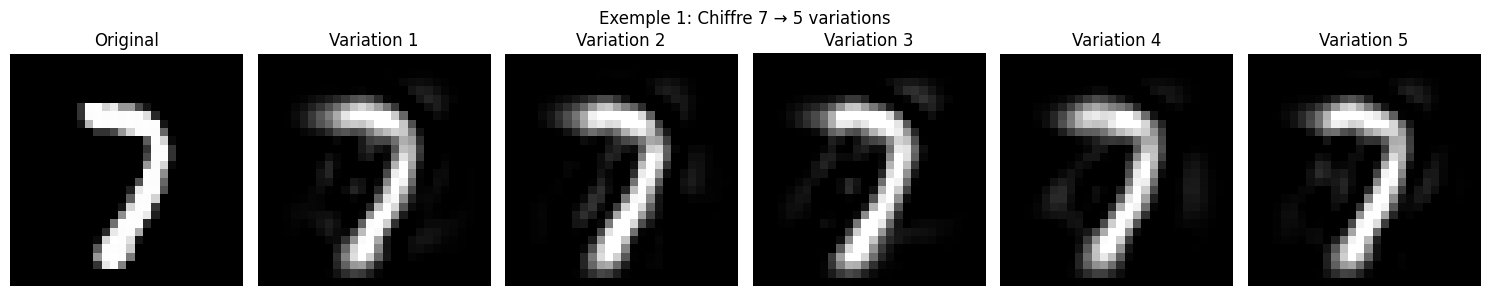

   • Erreur de reconstruction: 0.00619
   • Variance expliquée: 0.826

📊 Exemple 2: Génération de variations du chiffre 8
   • Image choisie: index 0


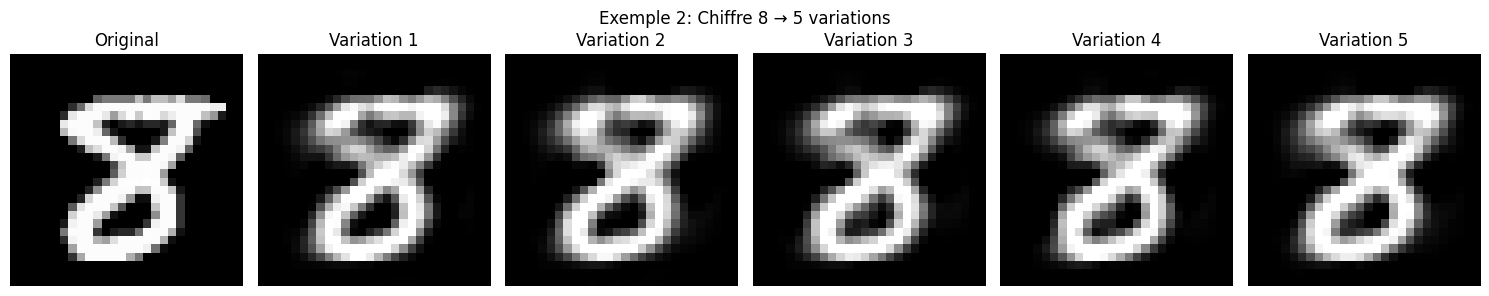

   • Erreur de reconstruction: 0.01380
   • Variance expliquée: 0.826

📊 Exemple 3: Génération de variations du chiffre 3
   • Image choisie: index 10


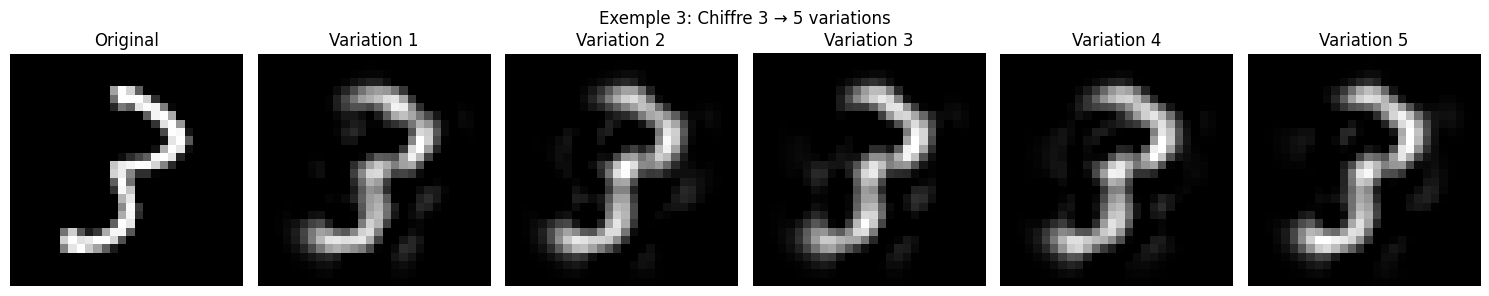

   • Erreur de reconstruction: 0.01101
   • Variance expliquée: 0.826

📊 ÉTUDE DE L'EFFET DU NIVEAU DE BRUIT


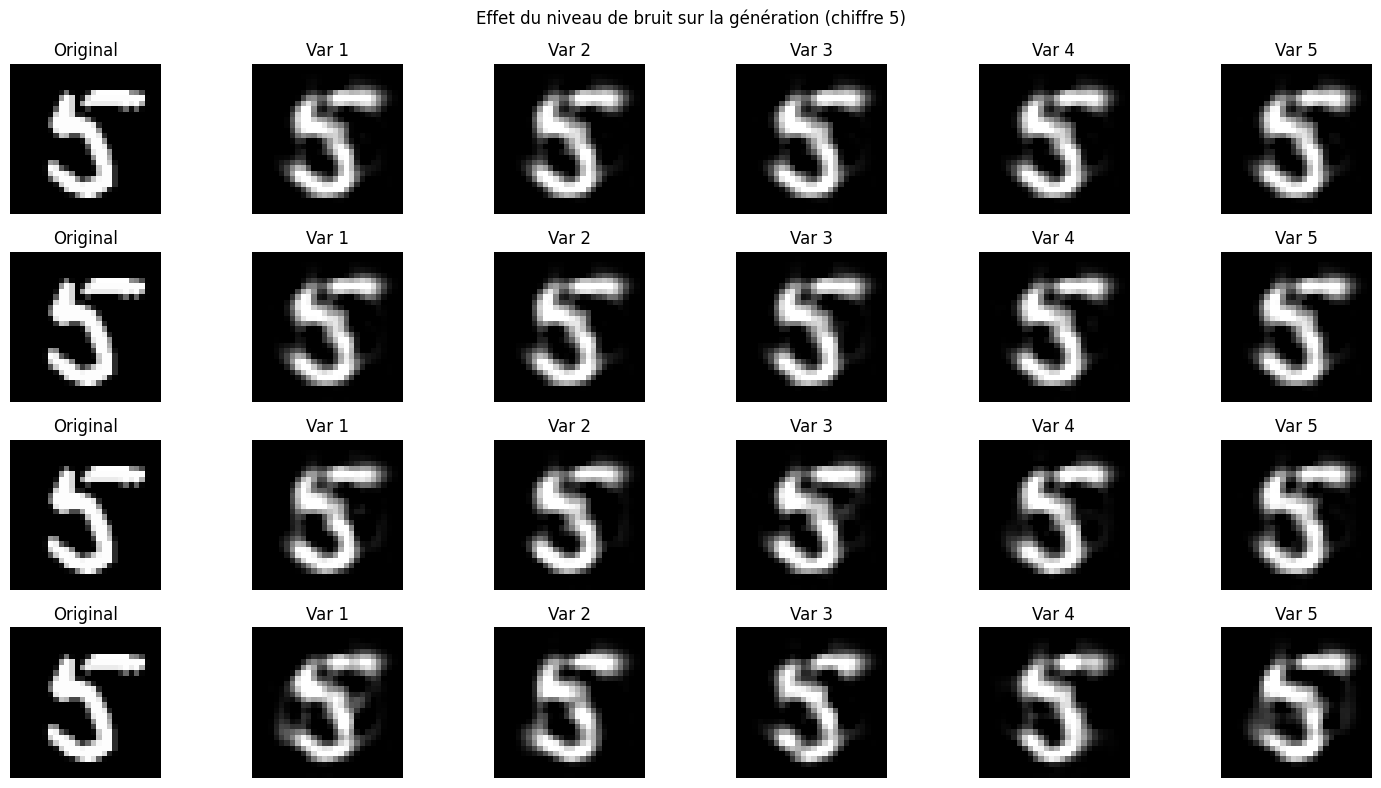

In [6]:
print("🎯 ÉTAPE 3: Génération de variations")

target_digits = [7, 8, 3]
n_components = 100

pca = FullScratchPCA(n_components=n_components)
pca.fit(X)


for idx, target_digit in enumerate(target_digits):
    print(f"\n📊 Exemple {idx + 1}: Génération de variations du chiffre {target_digit}")

    digit_indices = np.where(y == target_digit)[0]
    if len(digit_indices) == 0:
        print(f"   ❌ Aucune image du chiffre {target_digit} trouvée")
        continue

    original_image = X[digit_indices[0]]
    print(f"   • Image choisie: index {digit_indices[0]}")

    # Comprimer l'image originale
    compressed = pca.compress(original_image.reshape(1, -1))[0]

    # Générer 5 variations
    variations = []
    for i in range(5):
        # Ajouter du bruit aléatoire
        noise = np.random.normal(0, 0.15, compressed.shape)
        noisy_compressed = compressed + noise

        # Décomprimer
        new_image = pca.decompress(noisy_compressed.reshape(1, -1))[0]
        new_image = np.clip(new_image, 0, 1)
        variations.append(new_image)


    fig, axes = plt.subplots(1, 6, figsize=(15, 3))

    axes[0].imshow(original_image.reshape(28, 28), cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')


    for i, variation in enumerate(variations):
        axes[i + 1].imshow(variation.reshape(28, 28), cmap='gray')
        axes[i + 1].set_title(f"Variation {i + 1}")
        axes[i + 1].axis('off')

    plt.suptitle(f"Exemple {idx + 1}: Chiffre {target_digit} → 5 variations")
    plt.tight_layout()
    plt.show()

    # Métriques
    reconstruction_error = np.mean((original_image - pca.decompress(pca.compress(original_image.reshape(1, -1)))[0]) ** 2)
    print(f"   • Erreur de reconstruction: {reconstruction_error:.5f}")
    print(f"   • Variance expliquée: {np.sum(pca.explained_variance_ratio):.3f}")


print("\n📊 ÉTUDE DE L'EFFET DU NIVEAU DE BRUIT")

ref_digit = 5
ref_indices = np.where(y == ref_digit)[0]
if len(ref_indices) > 0:
    ref_image = X[ref_indices[0]]
    compressed_ref = pca.compress(ref_image.reshape(1, -1))[0]

    noise_levels = [0.05, 0.1, 0.2, 0.3]

    fig, axes = plt.subplots(len(noise_levels), 6, figsize=(15, 8))

    for row, noise_level in enumerate(noise_levels):
        axes[row, 0].imshow(ref_image.reshape(28, 28), cmap='gray')
        axes[row, 0].set_title("Original")
        axes[row, 0].axis('off')

        for col in range(5):
            noise = np.random.normal(0, noise_level, compressed_ref.shape)
            noisy_compressed = compressed_ref + noise
            variation = pca.decompress(noisy_compressed.reshape(1, -1))[0]
            variation = np.clip(variation, 0, 1)

            axes[row, col + 1].imshow(variation.reshape(28, 28), cmap='gray')
            axes[row, col + 1].set_title(f"Var {col+1}")
            axes[row, col + 1].axis('off')

        axes[row, 0].set_ylabel(f'Bruit: {noise_level}', rotation=0, labelpad=40, ha='center')

    plt.suptitle(f"Effet du niveau de bruit sur la génération (chiffre {ref_digit})")
    plt.tight_layout()
    plt.show()

In [7]:
# ## 7. Conclusions

# %%
print("🎯 CONCLUSIONS DE L'ANALYSE PCA")
print("=" * 50)

print("\n📊 RÉSULTATS PRINCIPAUX:")
print(f"   • Dataset: {len(X)} images MNIST de {X.shape[1]} pixels")
print(f"   • Meilleure compression: {best_compression['n_components']} composantes (ratio {best_compression['compression_ratio']:.1f}x)")
print(f"   • Meilleure qualité: {best_quality['n_components']} composantes (MSE {best_quality['mse']:.5f})")
print(f"   • Meilleur équilibre: {best_balance['n_components']} composantes")

print("\n🔍 OBSERVATIONS:")
print("   • La PCA permet une compression significative avec peu de perte de qualité")
print("   • 50 composantes suffisent pour une reconstruction de bonne qualité")
print("   • La génération de variations fonctionne bien avec un bruit modéré (0.1-0.15)")
print("   • Au-delà de 100 composantes, l'amélioration devient marginale")

print("\n💡 APPLICATIONS POSSIBLES:")
print("   • Compression d'images")
print("   • Réduction de dimensionnalité")
print("   • Augmentation de données (génération de variations)")
print("   • Visualisation en 2D/3D")
print("   • Débruitage d'images")

print("\n✅ Analyse PCA terminée avec succès!")

🎯 CONCLUSIONS DE L'ANALYSE PCA

📊 RÉSULTATS PRINCIPAUX:
   • Dataset: 10000 images MNIST de 784 pixels
   • Meilleure compression: 10 composantes (ratio 78.4x)
   • Meilleure qualité: 130 composantes (MSE 0.00409)
   • Meilleur équilibre: 130 composantes

🔍 OBSERVATIONS:
   • La PCA permet une compression significative avec peu de perte de qualité
   • 50 composantes suffisent pour une reconstruction de bonne qualité
   • La génération de variations fonctionne bien avec un bruit modéré (0.1-0.15)
   • Au-delà de 100 composantes, l'amélioration devient marginale

💡 APPLICATIONS POSSIBLES:
   • Compression d'images
   • Réduction de dimensionnalité
   • Augmentation de données (génération de variations)
   • Visualisation en 2D/3D
   • Débruitage d'images

✅ Analyse PCA terminée avec succès!
